In [123]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from itertools import combinations

In [124]:
# os.listdir("data/")

In [460]:
# data=pd.read_csv("C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/_AAMLGQEDPPQHGLPR_3_6_FAS_MOUSE.csv")
data=pd.read_csv("C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/_AcVDTALENLSTLK_2_16_FAS_MOUSE.csv")
# data=pd.read_csv("data/_DTSFEQHVLLHTGGK_3_21_FAS_MOUSE.csv")
data.head()

,NEH,pxt,RMSE,theo_A1/A0,exp_A1/A0,theo_t_A1/A0,exp_t_A1/A0,NH,T_NEH
0,24,0.0481,0.006609,0.786871,0.776111,1.999997,2.120908,107,23
1,24,0.0482,0.006508,0.786871,0.776111,2.002647,2.120908,107,23
2,24,0.0483,0.006414,0.786871,0.776111,2.005297,2.120908,107,23
3,24,0.0484,0.006327,0.786871,0.776111,2.007948,2.120908,107,23
4,24,0.0485,0.006247,0.786871,0.776111,2.010600,2.120908,107,23


In [461]:
ph=1.5574E-4
ph

0.00015574

In [462]:
# data["const"]=data.NEH*data.pxt
# data["new_pxt"]=1-ph- (data.const/( (1-ph)*(data["exp_t_A1/A0"]-data["theo_A1/A0"]) ) )
# data["new_neh"]=data.const/data.new_pxt
# data=data.sort_values(by="RMSE",ascending=True)
# data=data[(data.new_pxt>0) & (data.new_neh>0) & (data.new_neh<118)]

# # data["temp"]= (data.new_neh*data.new_pxt)/( (1-ph)*(1-ph-data.new_pxt) )
# # data["temp2"]=(data["exp_t_A1/A0"]-data["theo_A1/A0"])

# data["h1"]=data.NEH*data.pxt
# data["h2"]=data.new_neh*data.new_pxt
# data.head(290)

In [463]:
data["const"]=data.NEH*data.pxt
data["new_pxt"]=1-ph- (data.const/( (1-ph)*(data["exp_t_A1/A0"]-data["theo_A1/A0"]) ) )
data["new_neh"]=data.const/data.new_pxt
data=data.sort_values(by=["RMSE"],ascending=True)
# data=data[(data.new_pxt>0) & (data.new_neh>0) & (data.new_neh<118)]

# data["h1"]=data.NEH*data.pxt
# data["h2"]=data.new_neh*data.new_pxt
data.head(20)

,NEH,pxt,RMSE,theo_A1/A0,exp_A1/A0,theo_t_A1/A0,exp_t_A1/A0,NH,T_NEH,const,new_pxt,new_neh
13,24,0.0494,0.005874,0.786871,0.776111,2.034489,2.120908,107,23,1.185606,0.110970,10.683979
14,24,0.0495,0.005874,0.786871,0.776111,2.037146,2.120908,107,23,1.188006,0.109171,10.882054
12,24,0.0493,0.005882,0.786871,0.776111,2.031832,2.120908,107,23,1.183206,0.112770,10.492226
15,24,0.0496,0.005883,0.786871,0.776111,2.039804,2.120908,107,23,1.190406,0.107372,11.086788
11,24,0.0492,0.005899,0.786871,0.776111,2.029176,2.120908,107,23,1.180806,0.114569,10.306495
16,24,0.0497,0.005900,0.786871,0.776111,2.042462,2.120908,107,23,1.192806,0.105572,11.298479
10,24,0.0491,0.005925,0.786871,0.776111,2.026521,2.120908,107,23,1.178406,0.116368,10.126509
17,24,0.0498,0.005925,0.786871,0.776111,2.045120,2.120908,107,23,1.195206,0.103773,11.517512
31,25,0.0475,0.005934,0.786871,0.776111,2.033994,2.120908,107,23,1.187506,0.109546,10.840211
30,25,0.0474,0.005938,0.786871,0.776111,2.031238,2.120908,107,23,1.185006,0.111421,10.635421


In [464]:
# np.dot(data[["NEH","pxt"]][318],data[["new_pxt","new_neh"]][318])/(norm(data[["NEH","pxt"]][318])*norm(data[["new_pxt","new_neh"]][318]))

from sklearn.decomposition import PCA

pca = PCA() # Compute PCA
pca.fit_transform(  data[["const","RMSE"]])
eigenvalues = pca.explained_variance_ # Get eigenvalues
eigenvalues = np.round(eigenvalues, 8) # Round off eigenvalues
eigenvalues

array([4.89835e-03, 6.30000e-07])

(454, 12)


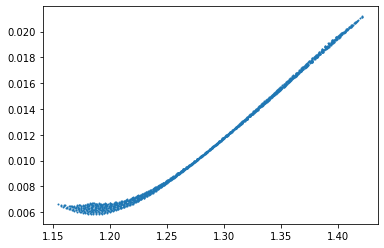

In [465]:
from matplotlib import pyplot as plt
# plt.figure(figsize=(15,6))
plt.scatter(data.const,data.RMSE,s=1)
print(data[data.new_pxt<0].shape)

In [466]:
tempdata=data[data.RMSE<2*min(data.RMSE)]
tempdata=tempdata[(tempdata.new_pxt>0) & (tempdata.new_neh>0) & (tempdata.new_neh<data.NH[0])]
tempdata["pxt_dif"]=(abs((tempdata.pxt) - (tempdata.new_pxt))) #(abs((tempdata.pxt) - (tempdata.new_pxt)))**2 + (abs((tempdata.NEH) - (tempdata.new_neh)))**2 
tempdata.sort_values(by=["pxt_dif"]).head(25)

,NEH,pxt,RMSE,theo_A1/A0,exp_A1/A0,theo_t_A1/A0,exp_t_A1/A0,NH,T_NEH,const,new_pxt,new_neh,pxt_dif
1115,41,0.0315,0.011141,0.786871,0.776111,2.120797,2.120908,107,23,1.291498,0.031581,40.894871,0.000081
740,35,0.0367,0.010644,0.786871,0.776111,2.120733,2.120908,107,23,1.284502,0.036826,34.879877,0.000126
935,38,0.0339,0.010906,0.786871,0.776111,2.120696,2.120908,107,23,1.288200,0.034054,37.828392,0.000154
1542,49,0.0265,0.011640,0.786871,0.776111,2.121137,2.120908,107,23,1.298498,0.026333,49.310432,0.000167
529,32,0.0400,0.010324,0.786871,0.776111,2.120632,2.120908,107,23,1.280003,0.040199,31.841589,0.000199
98,26,0.0488,0.009532,0.786871,0.776111,2.121198,2.120908,107,23,1.268807,0.048593,26.110622,0.000207
1442,47,0.0276,0.011548,0.786871,0.776111,2.121309,2.120908,107,23,1.297198,0.027308,47.503003,0.000292
872,37,0.0348,0.010864,0.786871,0.776111,2.121318,2.120908,107,23,1.287601,0.034503,37.318446,0.000297
1337,45,0.0288,0.011462,0.786871,0.776111,2.121722,2.120908,107,23,1.295998,0.028207,45.945468,0.000593
807,36,0.0357,0.010693,0.786871,0.776111,2.120075,2.120908,107,23,1.285201,0.036302,35.402902,0.000602


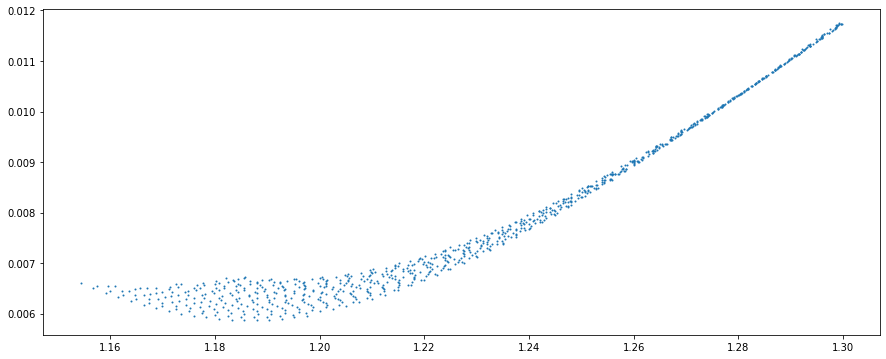

In [467]:
plt.figure(figsize=(15,6))
plt.scatter(tempdata.const,tempdata.RMSE,s=1)

In [468]:
(tempdata.sort_values(by=["pxt_dif"]).new_neh.head(5))

1115    40.894871
740     34.879877
935     37.828392
1542    49.310432
529     31.841589
Name: new_neh, dtype: float64

In [459]:
np.median(tempdata.sort_values(by=["pxt_dif"]).new_neh.head(5))

26.628244118010098

In [221]:
# plt.scatter(range(0,6),[3.94E+06,6.30E+06,8.23E+06,6.51E+06,3.99E+06,3.33E+06])

In [390]:
# plt.scatter(range(0,6),[4.77E+07,9.92E+07,1.11E+08,9.49E+07,5.45E+07,2.81E+07])